In [18]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Plotting methods for the original and generated data
def plot_digits_df(df):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axes in enumerate(ax.flat):
        im = axes.imshow(df.iloc[i,:].values.reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

def plot_digits_array(arr):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(arr[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

In [2]:
pca = PCA(0.95, whiten=True)

In [8]:
#Using the MNIST training dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/
train_df = pd.read_csv('./optdigits.tra',header=None)

In [16]:
X_train,  y_train  = train_df.loc[:,0:63],  train_df.loc[:,64]
X_train.shape

(3823, 64)

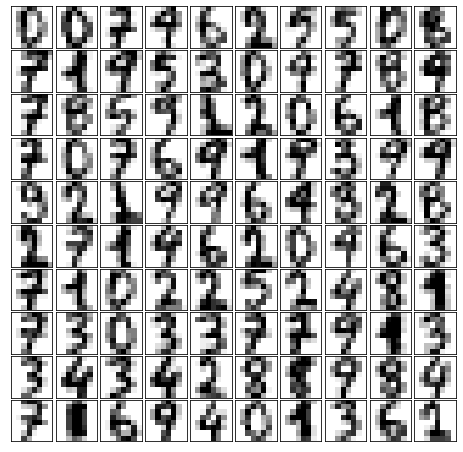

In [12]:
plot_digits_df(X_train)

In [15]:
#Apply PCA to reduce dimensionality
df = pca.fit_transform(X_train)
df.shape

(3823, 29)

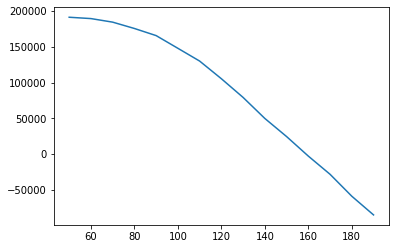

In [21]:
#Printing the AIC curve for all models with components in 50, 60, 70,...,200
n_components = np.arange(50, 200, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(df).aic(df) for model in models]
plt.plot(n_components, aics);

In [22]:
#Using the elbow heuristic from AIC curve, selecting the number of components as 110. 
#Check convergence of GMM using converged_
gmm = GMM(110, covariance_type='full', random_state=0)
gmm.fit(df)
print(gmm.converged_)

True


In [23]:
#Generating a sample of 100 images
Xgenerated, _ = gmm.sample(100)
Xgenerated.shape

(100, 29)

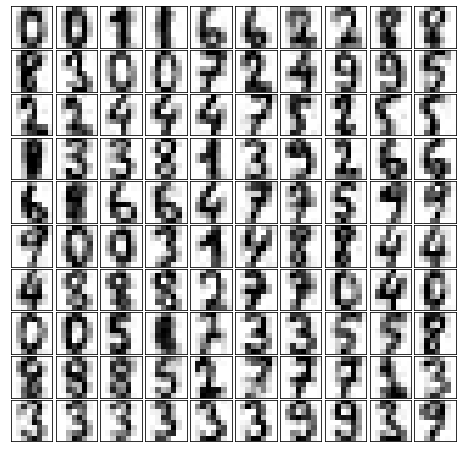

In [24]:
#Generating the plot of 100 new digits using GMM
digits_generated = pca.inverse_transform(Xgenerated)
plot_digits_array(digits_generated)